## Car auto_mpg exploratory analysis

This is my first use of machine learnig tool for analysis and predicttion.
In this exercise, I will be considering the popular auto_mpg (csv) data. The 
goal of this tutorial is to explore and gain insights into relationships between data
and also make prediction. I will be using linear regression model from scikit learn. 


To start with, I'll import all the required libraries...

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
my_head = ['mpg', 'cylinder', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

In [12]:
# Load data using pandas read_csv()
Auto_data = pd.read_csv('auto_mpg.csv')

Auto_data.columns('my_head')


TypeError: 'Index' object is not callable

In [31]:
# Let's peek into our data by selecting the first 5  rows (this can be changed by passing the required number as argument in 
# .head() or .tail() method ). In my case, I'll like to see the first 10 and last 10 rows

data.head(10) # this display the first 10 rows. I'll do the same for the last 10 rows using .tail() method


,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
6,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
8,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
9,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se


In [32]:
data.tail(10)


,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,car name
387,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
388,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
389,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
390,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
391,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [33]:
# In car name column,  car manufacturer name and model are concatenated (joined). I want to split this into different columns

data['manufacturer'], data['model'] = data['car name'].str.split(' ', 1).str

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
data.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,car name,manufacturer,model
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,ford,galaxie 500


In [35]:
# Check my column header
data.columns 

Index(['mpg', 'cylinder', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'manufacturer',
       'model'],
      dtype='object')

In [42]:
# Since I've splitted car name column, I want to delete it

data = data.drop(columns = 'car name')

KeyError: "['car name'] not found in axis"

In [37]:
data.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,manufacturer,model
0,15.0,8,350.0,165,3693,11.5,70,1,buick,skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth,satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc,rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford,torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford,galaxie 500


In [44]:
# Checking data type but that horsepower column is of type object instead of int or float as seen above.
data.dtypes

# Correct this anomaly, I'll need to see unique values in the horsepower

data['horsepower'].unique() # Obviously, I can see question mark (?) as part of the values. 

# If  I change the type to float, non-numeric value (?) will change to NaN. Whichever way, I'll replace it with average


array(['165', '150', '140', '198', '220', '215', '225', '190', '170',
       '160', '95', '97', '85', '88', '46', '87', '90', '113', '200',
       '210', '193', '?', '100', '105', '175', '153', '180', '110', '72',
       '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '130', '112', '92', '145', '137', '158', '167', '94', '107', '230',
       '49', '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [48]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors = 'coerce')

In [54]:
mean_hp = data['horsepower'].mean()

data['horsepower'] = data['horsepower'].fillna( mean_hp)

In [55]:
data.shape

(397, 10)

In [56]:
data.describe()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.225809,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [63]:
# I want to check if there are mismatch in nomenclature...which I found to be true e.g toyouta

data['manufacturer'].head(200).unique()

array(['buick', 'plymouth', 'amc', 'ford', 'chevrolet', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw'],
      dtype=object)

In [64]:
data['manufacturer'].tail(200).unique()

array(['honda', 'dodge', 'ford', 'pontiac', 'amc', 'volkswagen', 'datsun',
       'toyota', 'volvo', 'plymouth', 'peugeot', 'mercedes-benz',
       'cadillac', 'chevy', 'buick', 'renault', 'chevrolet', 'oldsmobile',
       'mercury', 'chrysler', 'subaru', 'bmw', 'mazda', 'audi', 'saab',
       'vw', 'maxda', 'mercedes', 'fiat', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

Pointing out inappropriate auto name seems easy using this approach but may lack efficiency when dataset increases...say 10000 rows

In [66]:
# Correcting inconsistency in naming convention

data['manufacturer'] = data['manufacturer'].str.replace('chevy|chevrolet|chevroelt', 'chevrolet')
data['manufacturer'] = data['manufacturer'].str.replace('maxda|mazda', 'mazda')
data['manufacturer'] = data['manufacturer'].str.replace('mercedes-benz|mercedes', 'mercedes')
data['manufacturer'] = data['manufacturer'].str.replace('toyouta|toyota', 'toyota')
data['manufacturer'] = data['manufacturer'].str.replace('volkswagen|vw|vokswagen', 'volkswagen')

# Grouping by manufacturer to check name inconsitency and finding its sum 
data.groupby(['manufacturer']).sum().head(20)


,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin
manufacturer,,,,,,,,
amc,510.9,178,7005.0,3201.404092,91858,427.4,2080,28
audi,187.0,30,783.0,607.000000,17893,111.6,530,14
bmw,47.5,8,242.0,223.000000,4834,25.3,147,4
buick,326.1,110,4640.0,2319.000000,60407,249.9,1294,17
cadillac,39.5,16,700.0,305.000000,8280,29.5,155,2
capri,25.0,4,140.0,92.000000,2572,14.9,76,1
chevrolet,932.3,282,10947.0,5258.000000,152413,711.7,3480,46
chrysler,103.6,42,1981.0,922.000000,23472,79.8,464,6
datsun,715.6,98,2375.0,1928.000000,51571,377.4,1768,69


In [67]:
# Let's do a summary of
data.describe()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.225809,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


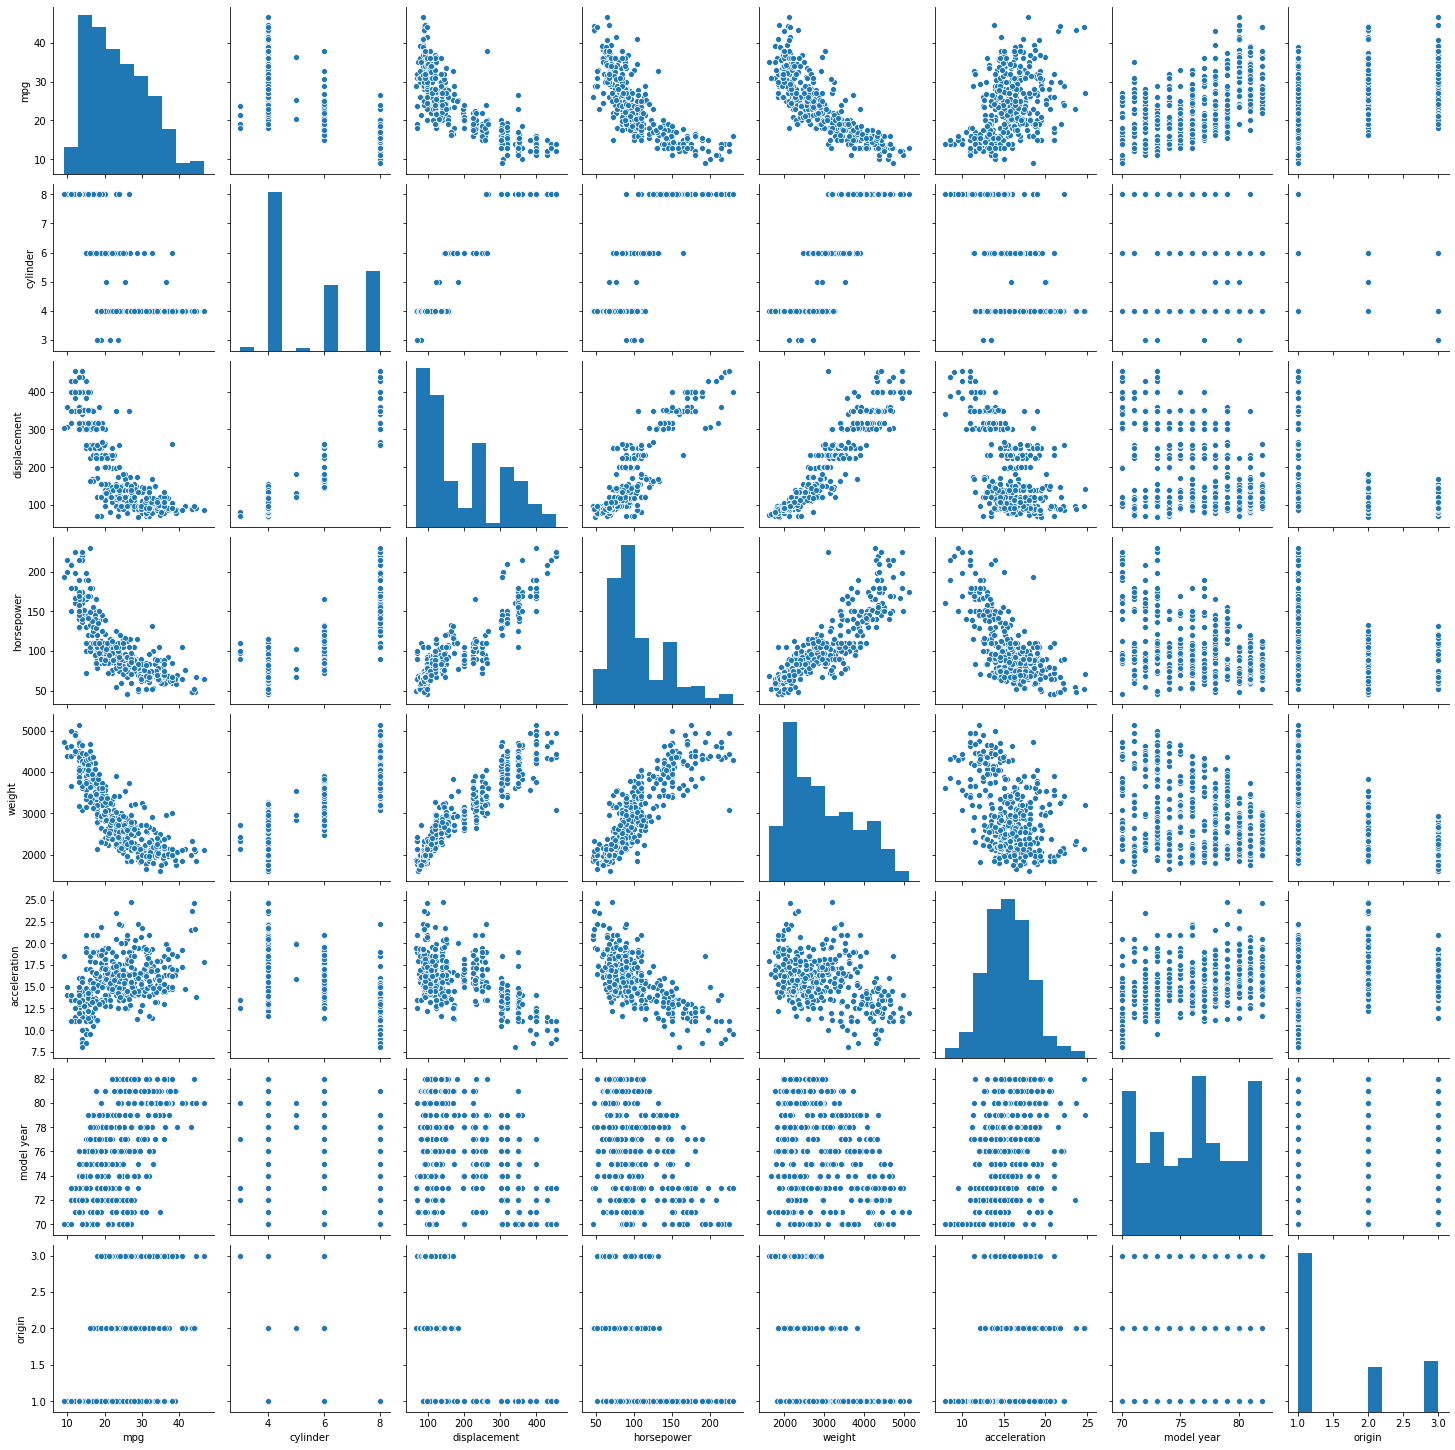

In [74]:
corr = data.corr()
sns.pairplot(data, kind='scatter')

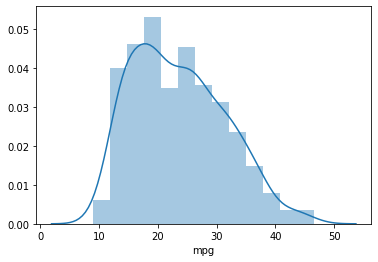

In [100]:
# Let's see the distribution of our data (You can preview other columns to have an overview of the skew & kurt)


sns.distplot(data['mpg'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

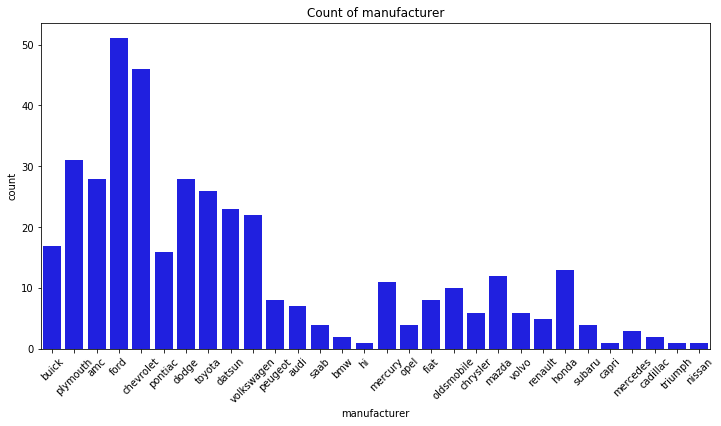

In [121]:
# Plotting the count of brands to know the popular brand in our dataset

plt.figure(figsize= (12,6))
sns.countplot(x= 'manufacturer', data=data, color= 'blue')
plt.title('Count of manufacturer')
plt.xticks( rotation=45)

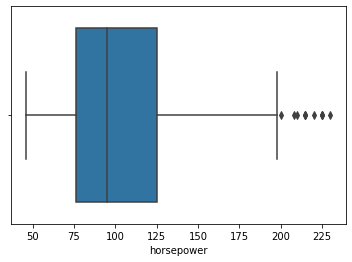

In [122]:
sns.boxplot(data['horsepower'])

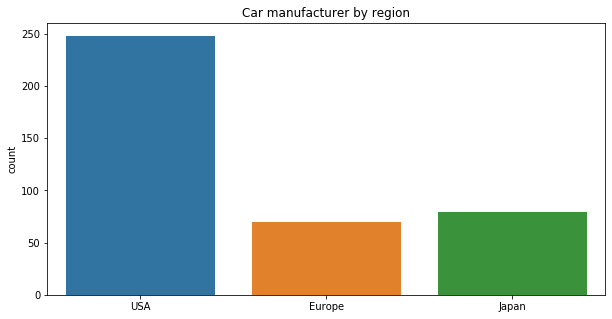

In [126]:
# Time to encode the values in column origin to their respective string

fig, ax = plt.subplots (figsize= (10,5))

sns.countplot(x = data.origin.values, data=data)

labels = [item.get_text() for item in ax.get_xticklabels()]

labels [0]= 'USA'
labels [1]= 'Europe'
labels [2]= 'Japan'

ax.set_xticklabels(labels)
ax.set_title('Car manufacturer by region')
plt.show()

In [130]:
# I want to map the origin value to string
map_origin = {1:'USA', 2:'Europe', 3:'Japan'}

data['new_origin'] = data['origin'].map(map_origin)

data['new_origin'].tail(20)

377       USA
378       USA
379     Japan
380     Japan
381     Japan
382     Japan
383     Japan
384     Japan
385       USA
386       USA
387       USA
388       USA
389     Japan
390       USA
391       USA
392       USA
393    Europe
394       USA
395       USA
396       USA
Name: new_origin, dtype: object

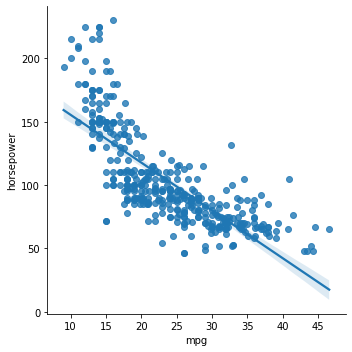

In [135]:
sns.lmplot(x='mpg', y='horsepower', data=data)

#### Let's start our prediction using 

##### Linear regression
##### Linear SCV and 
##### Naive Bayes


In [149]:
df= data.drop(['manufacturer', 'model', 'new_origin', 'mpg'], axis= 1)

df.columns

Index(['cylinder', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [166]:
# Import prediction models from scikit library

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (df, data['mpg'], test_size=0.33, random_state=10)

l_reg = LinearRegression()
model = l_reg.fit(x_train, y_train)

prediction = l_reg.predict(x_test)



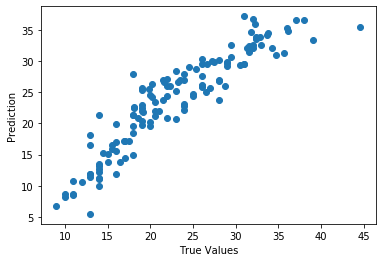

In [167]:
# Plot the model
plt.scatter(y_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Prediction")
plt.show()

In [168]:
print('Prediction Score is: ', model.score(x_train, y_train))

Prediction Score is:  0.812586074683962


In [174]:
residual = y_test - prediction

print("Linear Regression accuracy score: ", r2_score(x_test, model))

NameError: name 'r2_score' is not defined

In [175]:
import missingno

ModuleNotFoundError: No module named 'missingno'